In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
file = open('Readme.txt')
data =  file.readlines()

In [3]:
for i in data:
    print(i)



The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.

For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measur

In [4]:
train = np.loadtxt('training_ccpp_x_Y_train.csv', delimiter = ',')
test = np.loadtxt('test_ccpp_x_test.csv', delimiter = ',')


In [6]:
train.shape

(7176, 5)

In [7]:
test.shape

(2392, 4)

In [8]:
def cost(x,y,m):
    M = len(x)
    cost = 0 
    for i in range(M):
        cost+= ((1/(2*M))*(y[i]-sum(m*x[i]))**2)
    return cost

def step_gradient(x,y,lr,m):
    m_slope = np.zeros(len(x[0]))
    M = len(x)
    for i in range(M):
        X = x[i]
        Y = y[i]
        for j in range(len(X)):
            m_slope[j] += (-1/M)*(Y-sum(m*X))*X[j]
    new_m = m - (lr*m_slope)
    return new_m
        


def gd(x,y,lr,num):
    m = np.zeros(len(x[0]))
    
    for i in range(num):
        m = step_gradient(x, y, lr, m)
        print(i, "Cost: ", cost(x,y,m))
        plt.scatter(i,cost(x,y,m))
    plt.xlabel('Number of Features')
    plt.ylabel('Cost Function Value')
    plt.show()
    return m 




In [9]:
def run(train,test):
    x = train[:,:-1]
    y =[]
    for i in range(len(x[0])):
        for j in range(i,len(x[0])):
            y.append(x[:,i]*x[:,j] )
    y = np.array(y)
    for i in y:
        x = np.append(x, i.reshape(-1,1), axis =1)
    x  = np.append(x, (x[:,0]**4).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,1]**4).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,2]**4).reshape(-1,1) , axis = 1)
    x  = np.append(x, (x[:,3]**4).reshape(-1,1) , axis = 1)

    scaler = preprocessing.StandardScaler()
    scaler.fit(x)
    x = scaler.transform(x)
    
    x = np.append(x, np.ones(len(x)).reshape(-1,1), axis = 1)
    
    y= train[:,-1]
    lr = 0.18
    num = 800
    m = gd(x,y,lr,num)
    
    y = []
    for i in range(len(test[0])):
        for j in range(i,len(test[0])):
            y.append(test[:,i]*test[:,j] )
            
    y = np.array(y)
    for i in y:
        test = np.append(test, i.reshape(-1,1), axis =1)
        
    test  = np.append(test, (test[:,0]**4).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,1]**4).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,2]**4).reshape(-1,1) , axis = 1)
    test  = np.append(test, (test[:,3]**4).reshape(-1,1) , axis = 1)
    
    test1 = scaler.transform(test)
    x_test = np.append(test1,np.ones(len(test1)).reshape(-1,1), axis = 1)
    
    y_pred = []
    for i in x_test:
        y_pred.append(sum(i*m))

    y_pred = np.array(y_pred)
    return y_pred

0 Cost:  69559.2347142652
1 Cost:  46802.392714682974
2 Cost:  31498.073928884
3 Cost:  21205.01985237947
4 Cost:  14281.770685546699
5 Cost:  9624.593198290087
6 Cost:  6491.317504529394
7 Cost:  4382.889647566714
8 Cost:  2963.728321656552
9 Cost:  2008.172850929306
10 Cost:  1364.4747441874854
11 Cost:  930.5854928770942
12 Cost:  637.8761515968008
13 Cost:  440.19025430443287
14 Cost:  306.4828758841609
15 Cost:  215.87102938844336
16 Cost:  154.30545649050745
17 Cost:  112.33265291199578
18 Cost:  83.58997700645713
19 Cost:  63.793691635071035
20 Cost:  50.058461672023576
21 Cost:  40.43972875939235
22 Cost:  33.625954498691485
23 Cost:  28.73164032467913
24 Cost:  25.158114209304948
25 Cost:  22.49988787841639
26 Cost:  20.481659300522555
27 Cost:  18.915924328036716
28 Cost:  17.674448859712097
29 Cost:  16.66906343819031
30 Cost:  15.83872860077711
31 Cost:  15.140818789408216
32 Cost:  14.545244707627221
33 Cost:  14.030485943483022
34 Cost:  13.580909576316186
35 Cost:  13.18

287 Cost:  9.354696764993607
288 Cost:  9.354568405544214
289 Cost:  9.354440904372463
290 Cost:  9.354314246957207
291 Cost:  9.354188419101487
292 Cost:  9.354063406925055
293 Cost:  9.35393919685673
294 Cost:  9.353815775627112
295 Cost:  9.35369313026134
296 Cost:  9.353571248072226
297 Cost:  9.353450116653578
298 Cost:  9.353329723873308
299 Cost:  9.353210057867114
300 Cost:  9.35309110703214
301 Cost:  9.352972860020536
302 Cost:  9.352855305734098
303 Cost:  9.352738433317556
304 Cost:  9.35262223215347
305 Cost:  9.352506691856274
306 Cost:  9.352391802266947
307 Cost:  9.352277553447658
308 Cost:  9.352163935676584
309 Cost:  9.35205093944282
310 Cost:  9.351938555441098
311 Cost:  9.3518267745677
312 Cost:  9.351715587914855
313 Cost:  9.35160498676667
314 Cost:  9.351494962594444
315 Cost:  9.351385507052374
316 Cost:  9.351276611973159
317 Cost:  9.351168269363724
318 Cost:  9.351060471401334
319 Cost:  9.350953210429585
320 Cost:  9.350846478954368
321 Cost:  9.350740269

572 Cost:  9.332495580874237
573 Cost:  9.332442580284585
574 Cost:  9.33238968250244
575 Cost:  9.33233688715294
576 Cost:  9.3322841938632
577 Cost:  9.332231602261945
578 Cost:  9.33217911197989
579 Cost:  9.33212672264949
580 Cost:  9.332074433904848
581 Cost:  9.332022245381976
582 Cost:  9.331970156718546
583 Cost:  9.331918167554134
584 Cost:  9.33186627752977
585 Cost:  9.331814486288396
586 Cost:  9.331762793474521
587 Cost:  9.331711198734405
588 Cost:  9.331659701716092
589 Cost:  9.331608302069057
590 Cost:  9.33155699944453
591 Cost:  9.331505793495499
592 Cost:  9.331454683876219
593 Cost:  9.331403670243091
594 Cost:  9.331352752253668
595 Cost:  9.331301929567262
596 Cost:  9.331251201844701
597 Cost:  9.331200568748534
598 Cost:  9.331150029942789
599 Cost:  9.331099585092955
600 Cost:  9.331049233866121
601 Cost:  9.33099897593094
602 Cost:  9.33094881095757
603 Cost:  9.330898738617607
604 Cost:  9.330848758584256
605 Cost:  9.330798870532133
606 Cost:  9.33074907413

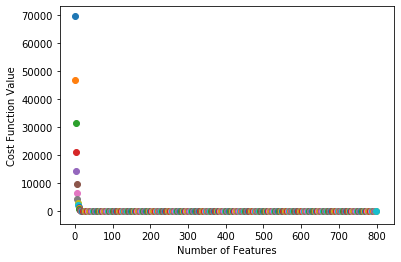

In [10]:
y_pred_ = run(train,test)

In [7]:
np.savetxt('y_pred_.csv',y_pred_,delimiter = ',', fmt = "%10f")

In [117]:
def coef_det(y_pred,y_test):
    u = ((y_test-y_pred)**2).sum()
    v = ((y_test-y_test.mean())**2).sum()
    cd = 1-(u/v)
    return cd